In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import time

%matplotlib inline

def aidemy_imshow(name, img):
    b, g, r = cv2.split(img)
    img = cv2.merge([r, g, b])
    plt.imshow(img)
    plt.show()

cv2.imshow = aidemy_imshow

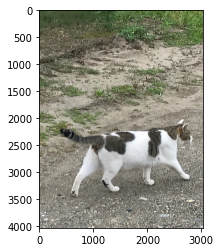

In [4]:
img = cv2.imread("cleansing_data/sample.jpg")
cv2.imshow("sample", img)

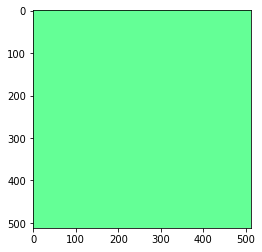

True

In [14]:
img_size = (512, 512)

my_img = np.array([[[150, 255, 100] for _ in range(img_size[1])] for _ in range(img_size[0])], dtype="uint8")
cv2.imshow("sample", my_img)
cv2.imwrite("cleansing_data/my_color_img.jpg", my_img)

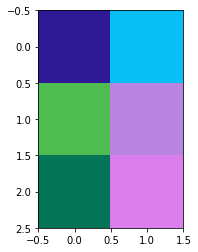

(array([[[150,  26,  46],
         [245, 191,   7]],
 
        [[ 81, 188,  79],
         [224, 131, 185]],
 
        [[ 86, 117,   3],
         [236, 125, 219]]], dtype=uint8),
 (3, 2, 3))

In [32]:
img_size = (3, 2)
my_img = np.array([[[np.random.randint(0, 256), np.random.randint(0, 256), np.random.randint(0, 256)] for _ in range(img_size[1])] for _ in range(img_size[0])], dtype="uint8")
cv2.imshow("sample", my_img)

my_img, my_img.shape

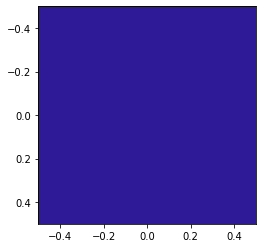

In [37]:
pixel = np.array([[[my_img[0, 0, 0], my_img[0, 0, 1], my_img[0, 0, 2]]]])
cv2.imshow("pixel", pixel)

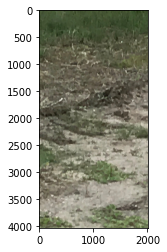

In [46]:
## 트리밍: 이미지의 일부를 잘라내는 작업
## 리사이즈: 이미지의 크기를 변경하는 작업

img = cv2.imread("cleansing_data/sample.jpg")
size = img.shape

my_img = img[: size[0] // 2, : size[1] // 3]

my_img.shape

my_img = cv2.resize(my_img, (my_img.shape[1] * 2, my_img.shape[0] * 2))
cv2.imshow("sample", my_img)


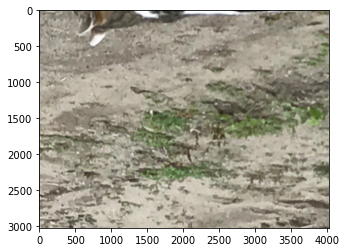

In [56]:
img = cv2.imread("cleansing_data/sample.jpg")

# 회전의 중심, 회전 각도(여기서는 이미지의 중심), 배율
mat = cv2.getRotationMatrix2D(tuple(np.array(img.shape[:2]) / 2), 180, 2.0)

# 변환이미지, 변환을 위한 행렬, 사이즈
my_img = cv2.warpAffine(img, mat, img.shape[:2])
cv2.imshow("sample", my_img)

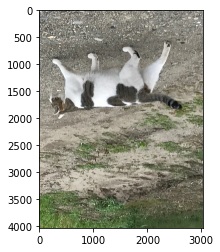

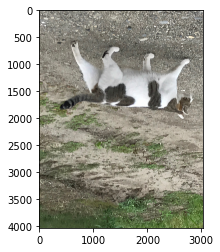

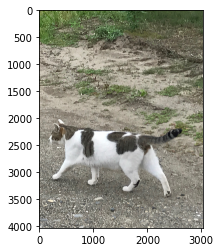

In [64]:
# 순서대로 두 축, x축, y축 중심 반전
for n in (-1, 0, 1):
    my_img = cv2.flip(img, n)
    cv2.imshow("sample", my_img)

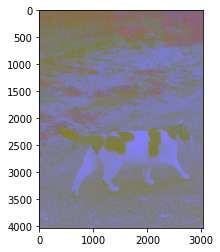

In [65]:
## 색 공간 변환
my_img = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
cv2.imshow("sample", my_img)

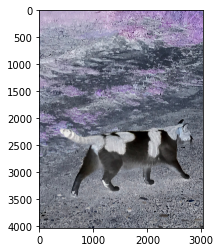

In [68]:
my_img = cv2.bitwise_not(img)
cv2.imshow("sample", my_img)

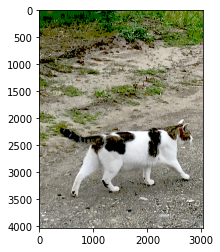

In [74]:
## 임계값 처리(이진화)
# 처리할 이미지, 임계값, 최대값, 방법(THRESH_BINARY/BINARY_INV/TOZERO/TOZERO_INV)
retval, my_img = cv2.threshold(img, 75, 255, cv2.THRESH_TOZERO)
cv2.imshow("sample", my_img)

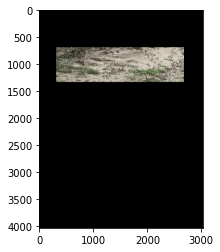

In [79]:
## 마스킹
mask = cv2.imread("cleansing_data/mask.png", 0)
mask = cv2.resize(mask, (img.shape[1], img.shape[0]))

my_img = cv2.bitwise_and(img, img, mask = mask)
cv2.imshow("sample", my_img)

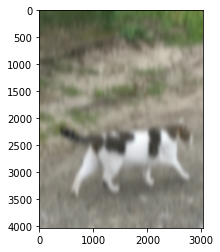

In [85]:
## 블러
# 원본이미지, 마스크 크기, x축 방향의 편차
my_img = cv2.GaussianBlur(img, (125, 325), 0)
cv2.imshow("sample", my_img)

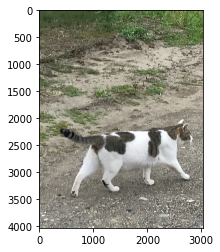

In [89]:
## 노이즈 제거
my_img = cv2.fastNlMeansDenoisingColored(img)
cv2.imshow("sample", my_img)